In [387]:
# reference : https://statisticsglobe.com/biplot-pca-python (Statistics Globe)

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [389]:
def biplot(dataset, labels = None):
    
    df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

    scaler = StandardScaler()
    scaler.fit(df) 
    dataset_scaled = scaler.transform(df)

    pca = PCA(n_components =2)
    score = pca.fit_transform(dataset_scaled)
    coef = pca.components_.T
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0 / (abs(xs).max() - abs(xs).min())
    scaley = 1.0 / (abs(ys).max() - abs(ys).min())
    
    xm_scalex = xs.max() * scalex
    ym_scalex = ys.max() * scaley
    if(xm_scalex > ym_scalex):
        plt.xlim(-xm_scalex, xm_scalex)
        plt.ylim(-xm_scalex, xm_scalex)
    else :
        plt.xlim(-ym_scalex, ym_scalex)
        plt.ylim(-ym_scalex, ym_scalex)
        
    plt.scatter(xs * scalex, -ys * scaley, s = 5,  c = dataset.target / len(set(dataset.target)))
    # 数学的には問題無い（固有ベクトルの正負）が，Rのbiplot関数と出力を同じにするため，ys * scaleyに'-'を掛けている．
 
    for i in range(n): # 数学的には問題無い（固有ベクトルの正負）が，Rのbiplot関数と出力を同じにするため，coef[i,1]に'-'を掛けている．
        plt.arrow(0, 0, coef[i,0], -coef[i,1], color = 'purple', alpha = 0.5)
        plt.text(coef[i,0], -coef[i,1], labels[i], color = 'darkblue', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

    plt.figure()

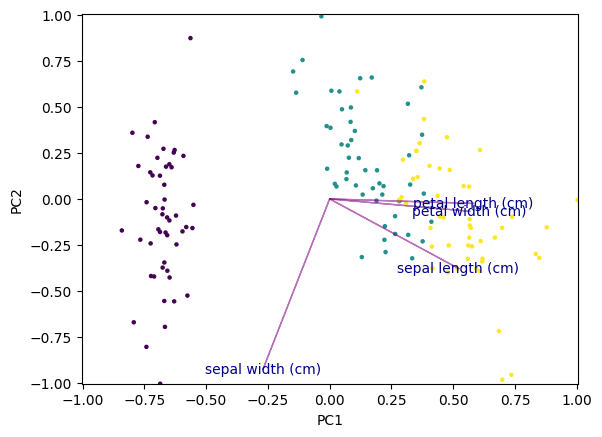

<Figure size 640x480 with 0 Axes>

In [390]:
iris = datasets.load_iris()
biplot(iris, iris.feature_names)